# Fashion MNIST

In [133]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [134]:
# Loading dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_imgs,train_labels),(test_imgs,test_labels) = fashion_mnist.load_data()

In [135]:
print(train_imgs.shape)
print(train_labels.shape)
print(test_imgs.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [61]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

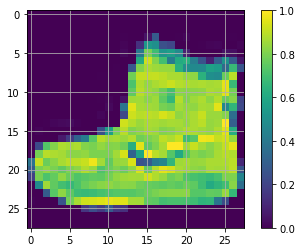

In [63]:
plt.figure()
plt.imshow(train_imgs[0])
plt.grid()
plt.colorbar()
plt.show()

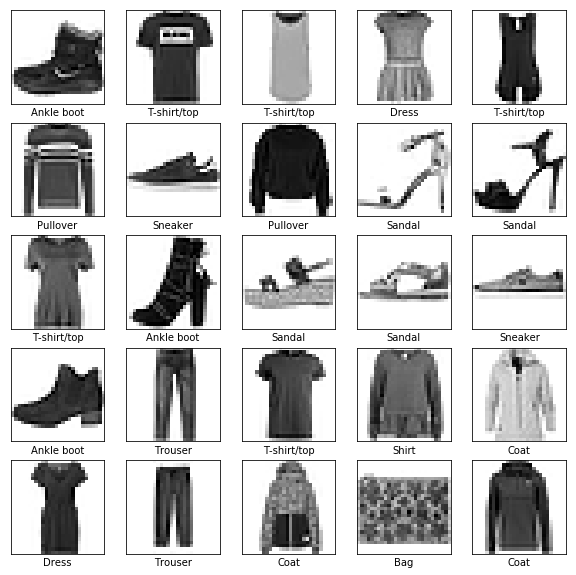

In [94]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [108]:
# Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [120]:
model.fit(train_imgs,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1360 - acc: 0.9485
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1328 - acc: 0.9494
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1323 - acc: 0.9500
Epoch 4/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1277 - acc: 0.9515
Epoch 5/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1247 - acc: 0.9526


In [121]:
test_loss,test_acc = model.evaluate(test_imgs,test_labels)
print('Test Accuracy',test_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.4483 - acc: 0.8848
Test Accuracy 0.8848


In [122]:
predictions = model.predict(test_imgs)

In [128]:
np.argmax(predictions[0])

9

In [137]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [151]:
def plot_image(i, prediction_array, true_label, img):
    prediction_array, true_label, img = prediction_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(prediction_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(prediction_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

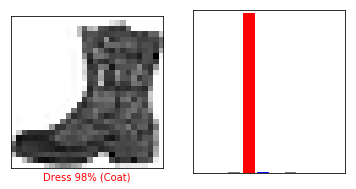

In [158]:
i = 150
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, train_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

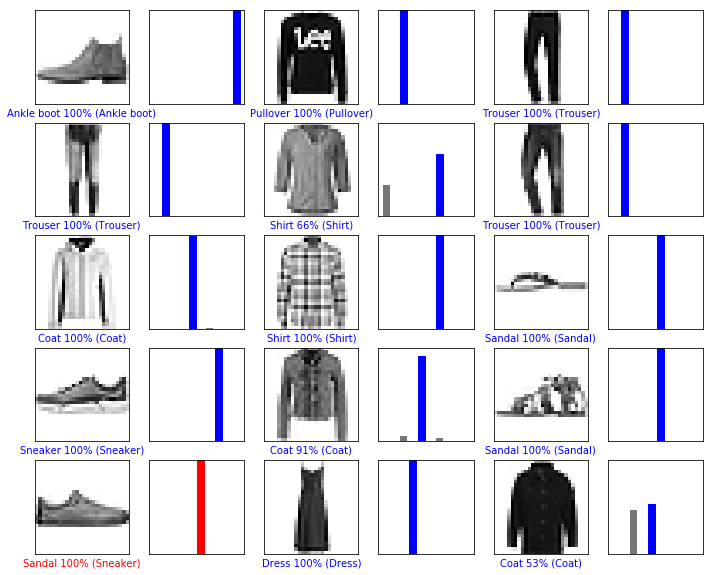

In [161]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_imgs)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [189]:
# Predict s single image

img = test_imgs[1000]
print(img.shape)
img = np.expand_dims(img,0)
print(img.shape)

(28, 28)
(1, 28, 28)


In [190]:
predict_single = model.predict(img)
print(predict_single)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
